In [1]:
############################
### Discrete Probability ###
############################

#Create an array containing 10 000 random ints between 0-9
def discrete_random_probability(size,start,stop,histrogram=False):
    import numpy as np

    size = size
    rng = np.random
    sample_space = rng.randint(start,stop+1,size=size)

    #Count the amount of each int in the same space

    event_space, probability_distribution = np.unique(sample_space, return_counts=True)
    probability_distribution = [count/float(size) for count in probability_distribution]

    #Find the errors from the expected value and the total error
    errors = [abs((1.0/len(event_space)) - probability) for probability in probability_distribution]
    error = sum(errors)


    if histrogram:
    # Plot as an histogram
        import matplotlib.pyplot as plt

        fg, ax = plt.subplots(figsize=(12,6))
        ax.bar(event_space,probability_distribution)
        plt.show()
    
    return probability_distribution, error

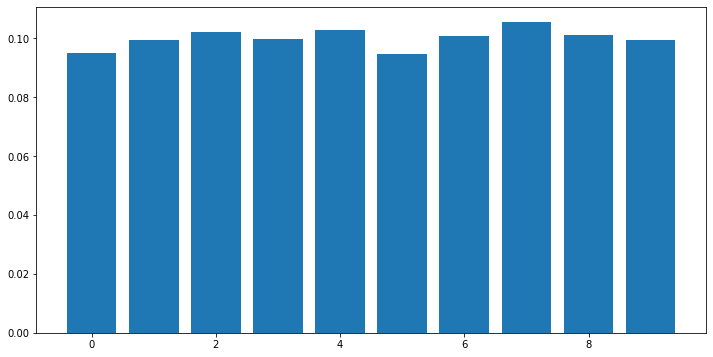

([0.0951,
  0.0992,
  0.1021,
  0.0996,
  0.1028,
  0.0947,
  0.1008,
  0.1054,
  0.101,
  0.0993],
 0.0242)

In [2]:
discrete_random_probability(10000,0,9,histrogram=True)

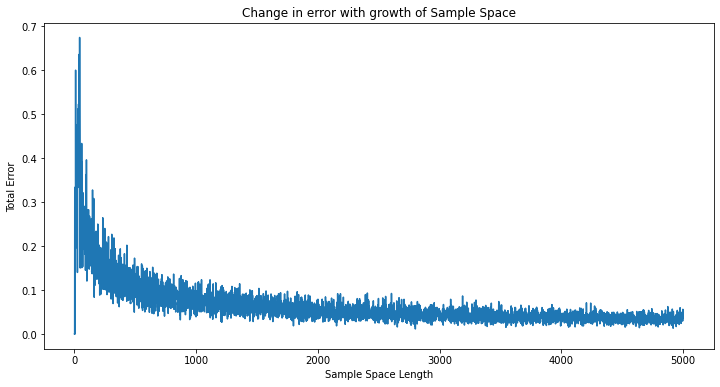

In [3]:
import matplotlib.pyplot as plt
#How many numbers do we need before the distribution is uniform
size = 5000
result = []
for i in range(1,size+1):
    probability_distribution, error = discrete_random_probability(i,0,9)
    result.append(error)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(1,size+1),result)
ax.set(xlabel='Sample Space Length',ylabel='Total Error',title='Change in error with growth of Sample Space')
plt.show()

At small values, less than 1000 points, the error can be quite large. However this seems to reduce to less than 0.1 quite quickly, around 1500. Note though how the error is seemingly random itself, it seems too jagged. Should you reasonabily expect some straight line segments where the error does not change from sample space length by pure chance? Though two subsequent errors would not be visable and you require a larger amount to be connected in this way.

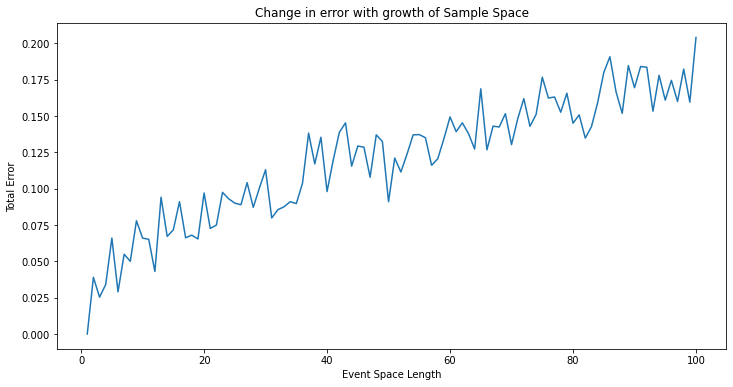

In [4]:
#How does event space length influence this?
#Using a sampmple space of 2000 and an event space length that differes from 1 to 100

size = 2000
result = []
for i in range(1,101):
    probability_distribution, error = discrete_random_probability(size,1,i)
    result.append(error)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(1,101),result)
ax.set(xlabel='Event Space Length',ylabel='Total Error',title='Change in error with growth of Sample Space')
plt.show()


This makes sense, the error tends to increase when there are more options to be wrong. This now raises the question of how large should a sample space be compared to the event space to ensure with relative certainty that the error is acceptably small. Note again the jaggedness of the plot and also the brief straight line segments. Though it does also lead me to ask if theres a relationship between the line of best fit and errors from that line.

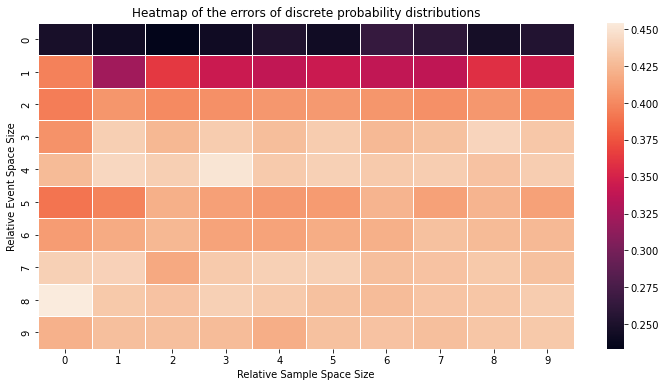

In [5]:
#Add an event space thats some percentage of the sample space while varying the size of the sample space
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

small_sample_space = 1000
max_sample_space = 10000
result= np.zeros(shape=(10,10))
column = 0

for i in range(small_sample_space,max_sample_space+1,1000):
    row = 0
    for ii in np.arange(0.1,1.1,0.1):
        event_space_length = i*ii//1
        probability_distribution, error = discrete_random_probability(i,1,event_space_length)
        result[row][column] = error
        row += 1
    column += 1
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(result, linewidths=0.5)
ax.set(xlabel='Relative Sample Space Size',ylabel='Relative Event Space Size',title='Heatmap of the errors of discrete probability distributions')
plt.show()

The size of the event space should ideally be around 20% of the sample space according to these results. Should be intersting to see what the textsbooks say about this.